In [1]:
# Importations des bibliothèques 
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import os 

In [2]:
# importation des données
df = pd.read_csv("data_idf/MENSQ_75_previous-1950-2022.csv", delimiter=";")
df1 = pd.read_csv("data_idf/MENSQ_77_previous-1950-2022.csv", delimiter=";")

In [3]:
df1.tail()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMM,RR,QRR,NBRR,RR_ME,...,QNEIGETOTM,NEIGETOTAB,QNEIGETOTAB,NEIGETOTABDAT,NBJNEIGETOT1,NBJNEIGETOT10,NBJNEIGETOT30,NBJGREL,NBJORAG,NBJBROU
38326,77530001,VOULTON_SAPC,48.612667,3.350333,175,202208,15.4,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38327,77530001,VOULTON_SAPC,48.612667,3.350333,175,202209,57.1,1.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38328,77530001,VOULTON_SAPC,48.612667,3.350333,175,202210,79.3,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38329,77530001,VOULTON_SAPC,48.612667,3.350333,175,202211,43.8,1.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38330,77530001,VOULTON_SAPC,48.612667,3.350333,175,202212,53.3,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
""""____________________________fonction permettant lea visualisation des données manquantes_________________________________"""



def profil_données(nom_data):  
    
    msno.matrix(nom_data)

    # Récupérer les noms de colonnes
    noms_colonnes = nom_data.columns

    # on Personnalise l'affichage en ajoutant les noms de colonnes à l'en-tête
    plt.title("Matrice de valeurs manquantes avec noms de colonnes")
    plt.xlabel("Colonnes")
    plt.ylabel("Lignes")
    plt.xticks(ticks=range(len(noms_colonnes)), labels=noms_colonnes, rotation=90)

    # on Affiche le graphique
    return plt.show()

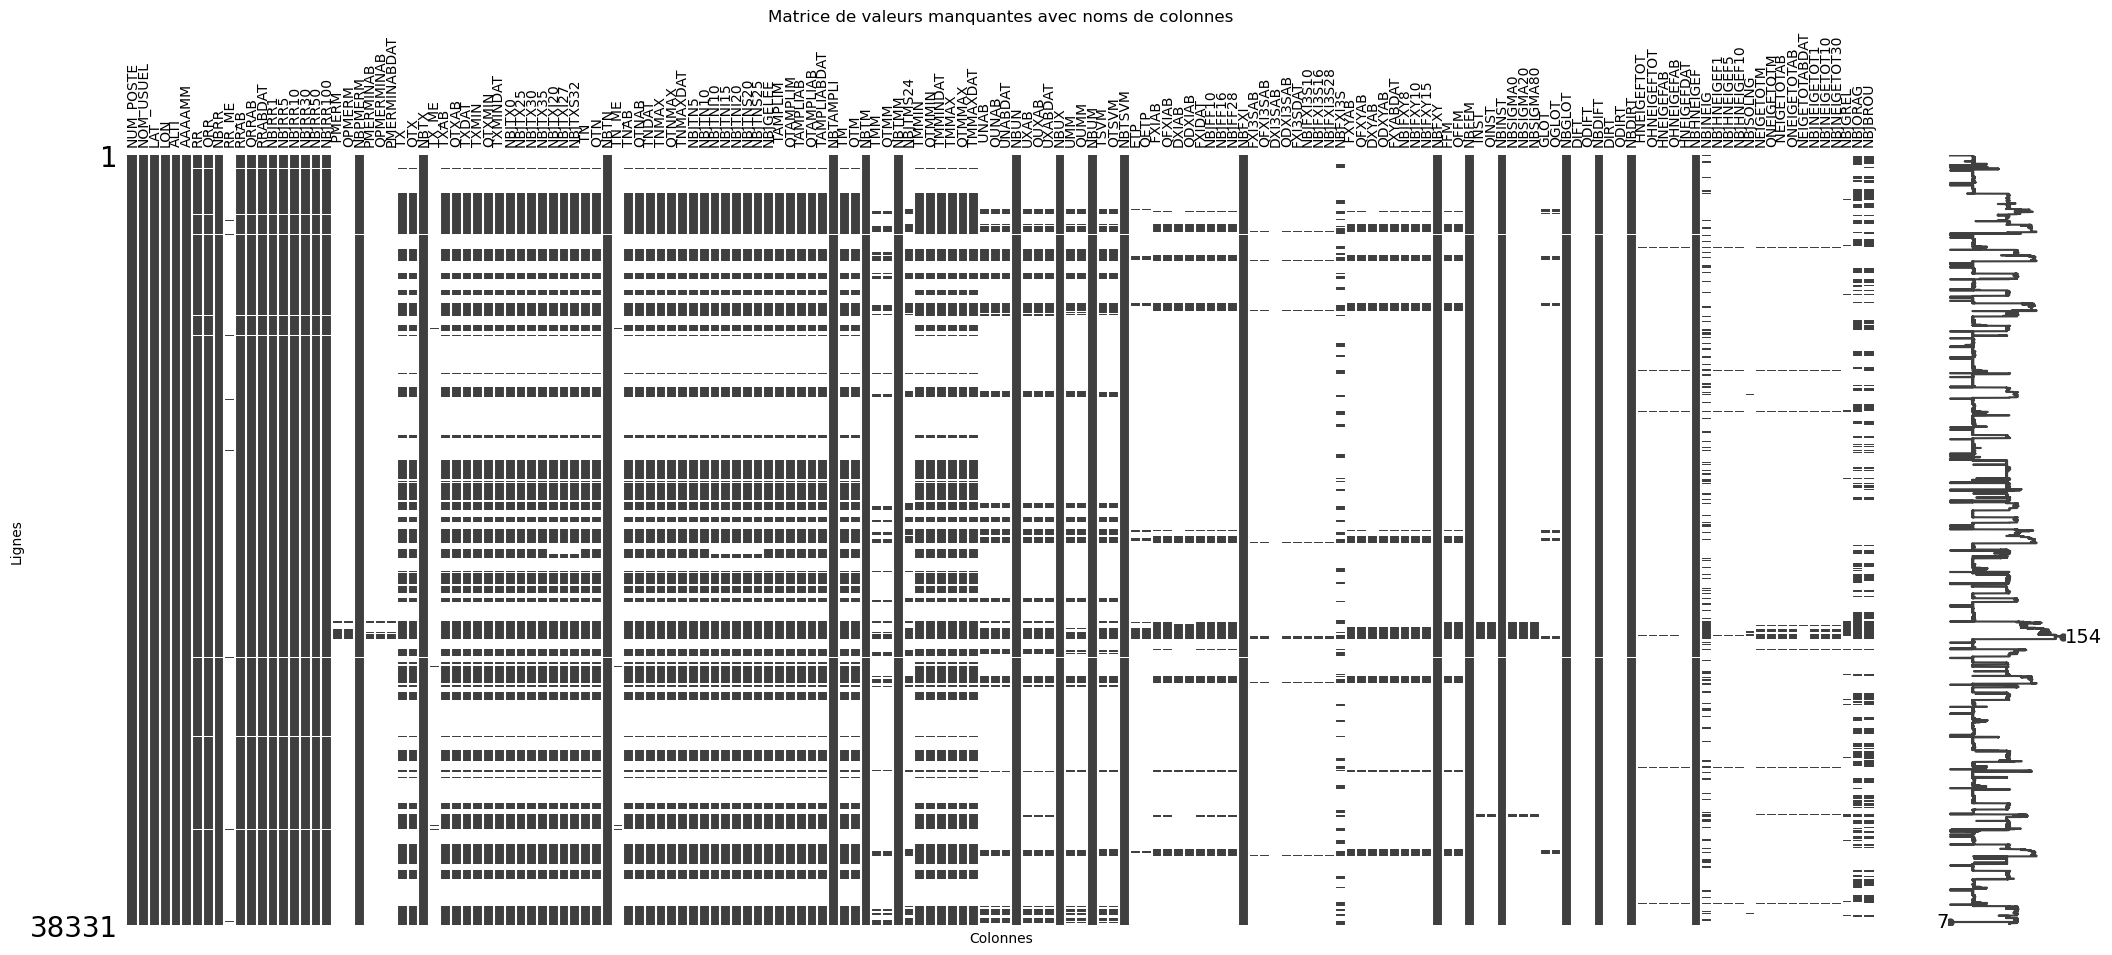

In [5]:
profil_données(df1)

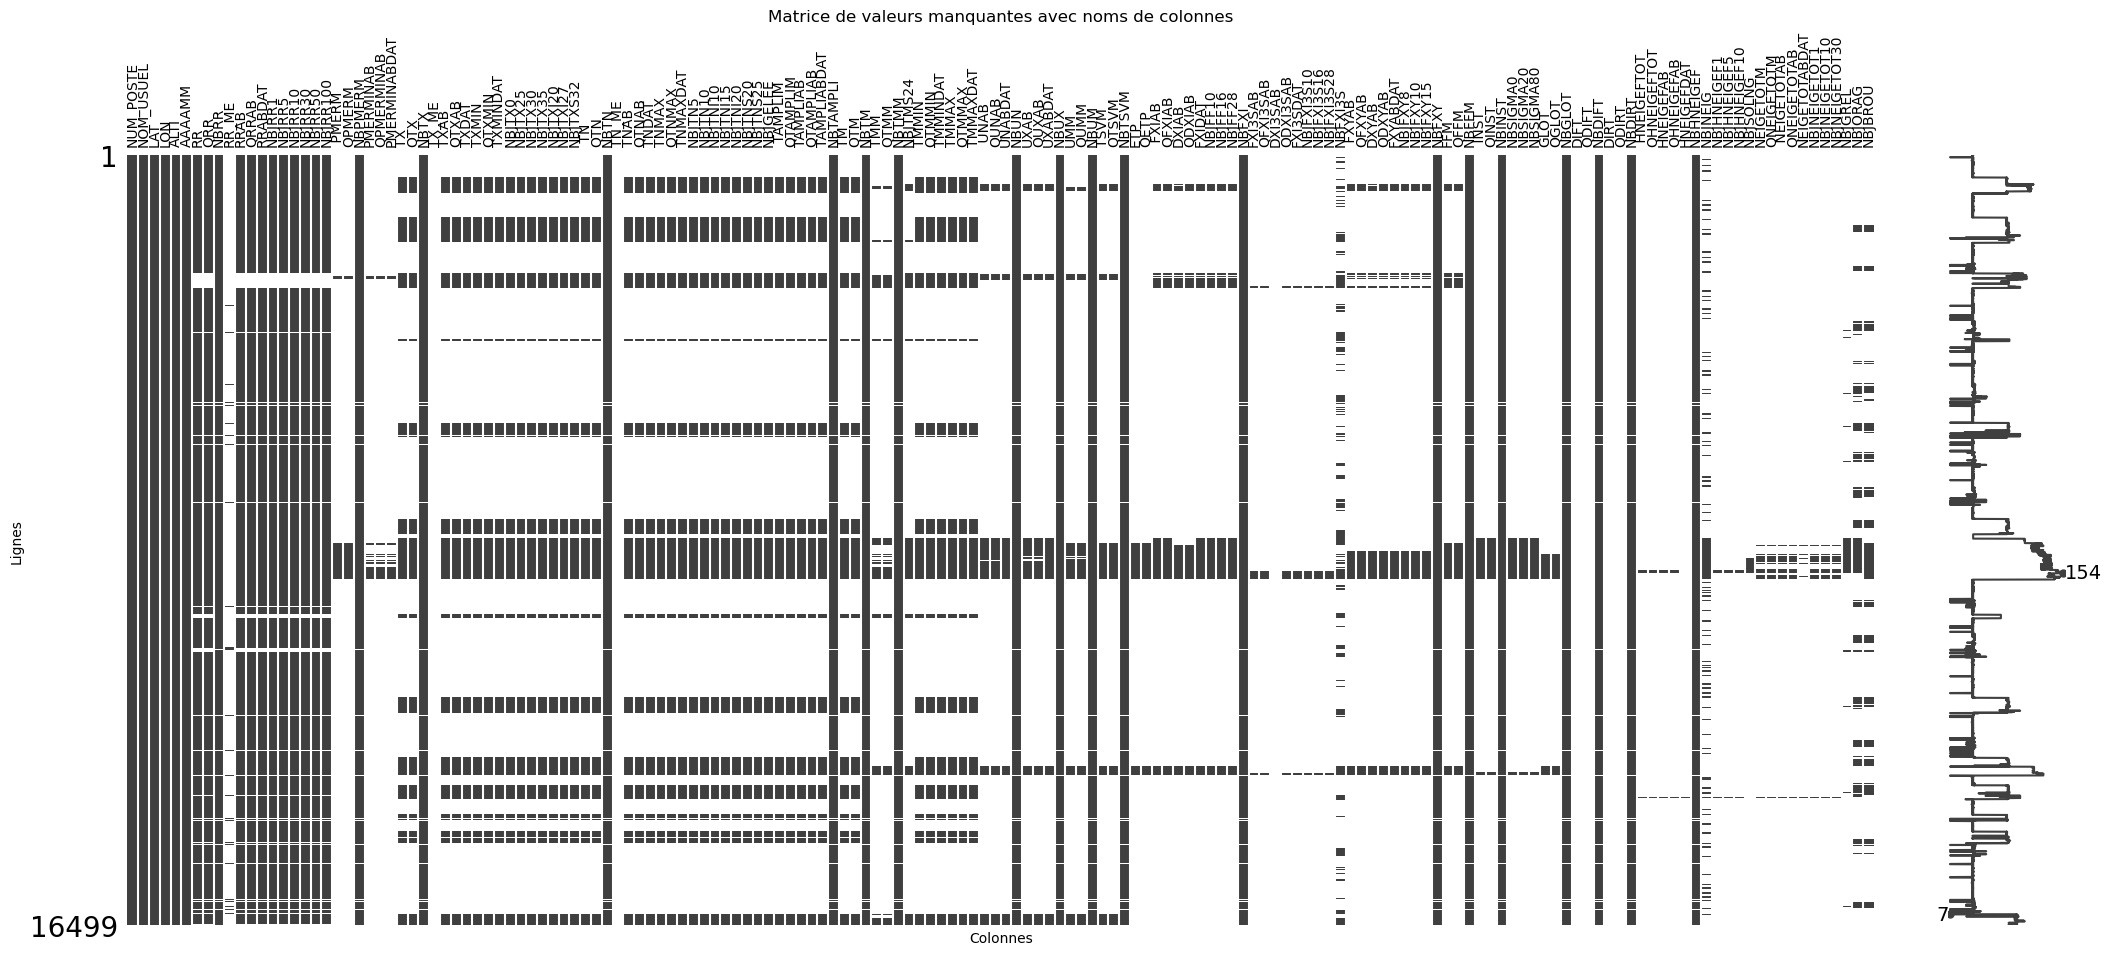

In [6]:
profil_données(df)

On constate que les dataframes ont la meme structure 

##### Fonction pour concatener les dataframes de notre région

Etant donnée que notre problématique consiste à comprendre l'évolution de la çtempérature nous aurons besoin d'au moin un enregistrement par année et pour y parvenire nous allons concatener tous les dataframes en faisant la moyenne des données 
en fonction de la date pour n'avoir qu'une seule valeur par date.

In [7]:
def concateneur(dossier):

    # Liste pour stocker les DataFrames à concaténer
    dfs = []

    # Parcours des fichiers CSV dans le dossier
    for fichier in sorted(os.listdir(dossier)):
        if fichier.endswith('.csv'):
            chemin_fichier = os.path.join(dossier, fichier)
            
            # Lecture du fichier CSV et ajout à la liste des DataFrames
            df = pd.read_csv(chemin_fichier, delimiter=";")
            dfs.append(df)

    # Concaténation des DataFrames
    concatenated_df = pd.concat(dfs)
    return concatenated_df

In [8]:
# Utilisatin de le fonction de concaténation
df_concat = concateneur("data_idf")

In [9]:
df_concat

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMM,RR,QRR,NBRR,RR_ME,...,QNEIGETOTM,NEIGETOTAB,QNEIGETOTAB,NEIGETOTABDAT,NBJNEIGETOT1,NBJNEIGETOT10,NBJNEIGETOT30,NBJGREL,NBJORAG,NBJBROU
0,75106001,LUXEMBOURG,48.844667,2.333833,46,202301,49.3,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75106001,LUXEMBOURG,48.844667,2.333833,46,202302,2.4,1.0,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75106001,LUXEMBOURG,48.844667,2.333833,46,202303,58.3,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75106001,LUXEMBOURG,48.844667,2.333833,46,202304,63.4,1.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75106001,LUXEMBOURG,48.844667,2.333833,46,202305,62.5,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10542,95690001,WY-DIT,49.108167,1.830667,126,202208,3.6,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10543,95690001,WY-DIT,49.108167,1.830667,126,202209,52.4,1.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10544,95690001,WY-DIT,49.108167,1.830667,126,202210,41.4,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10545,95690001,WY-DIT,49.108167,1.830667,126,202211,58.4,1.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


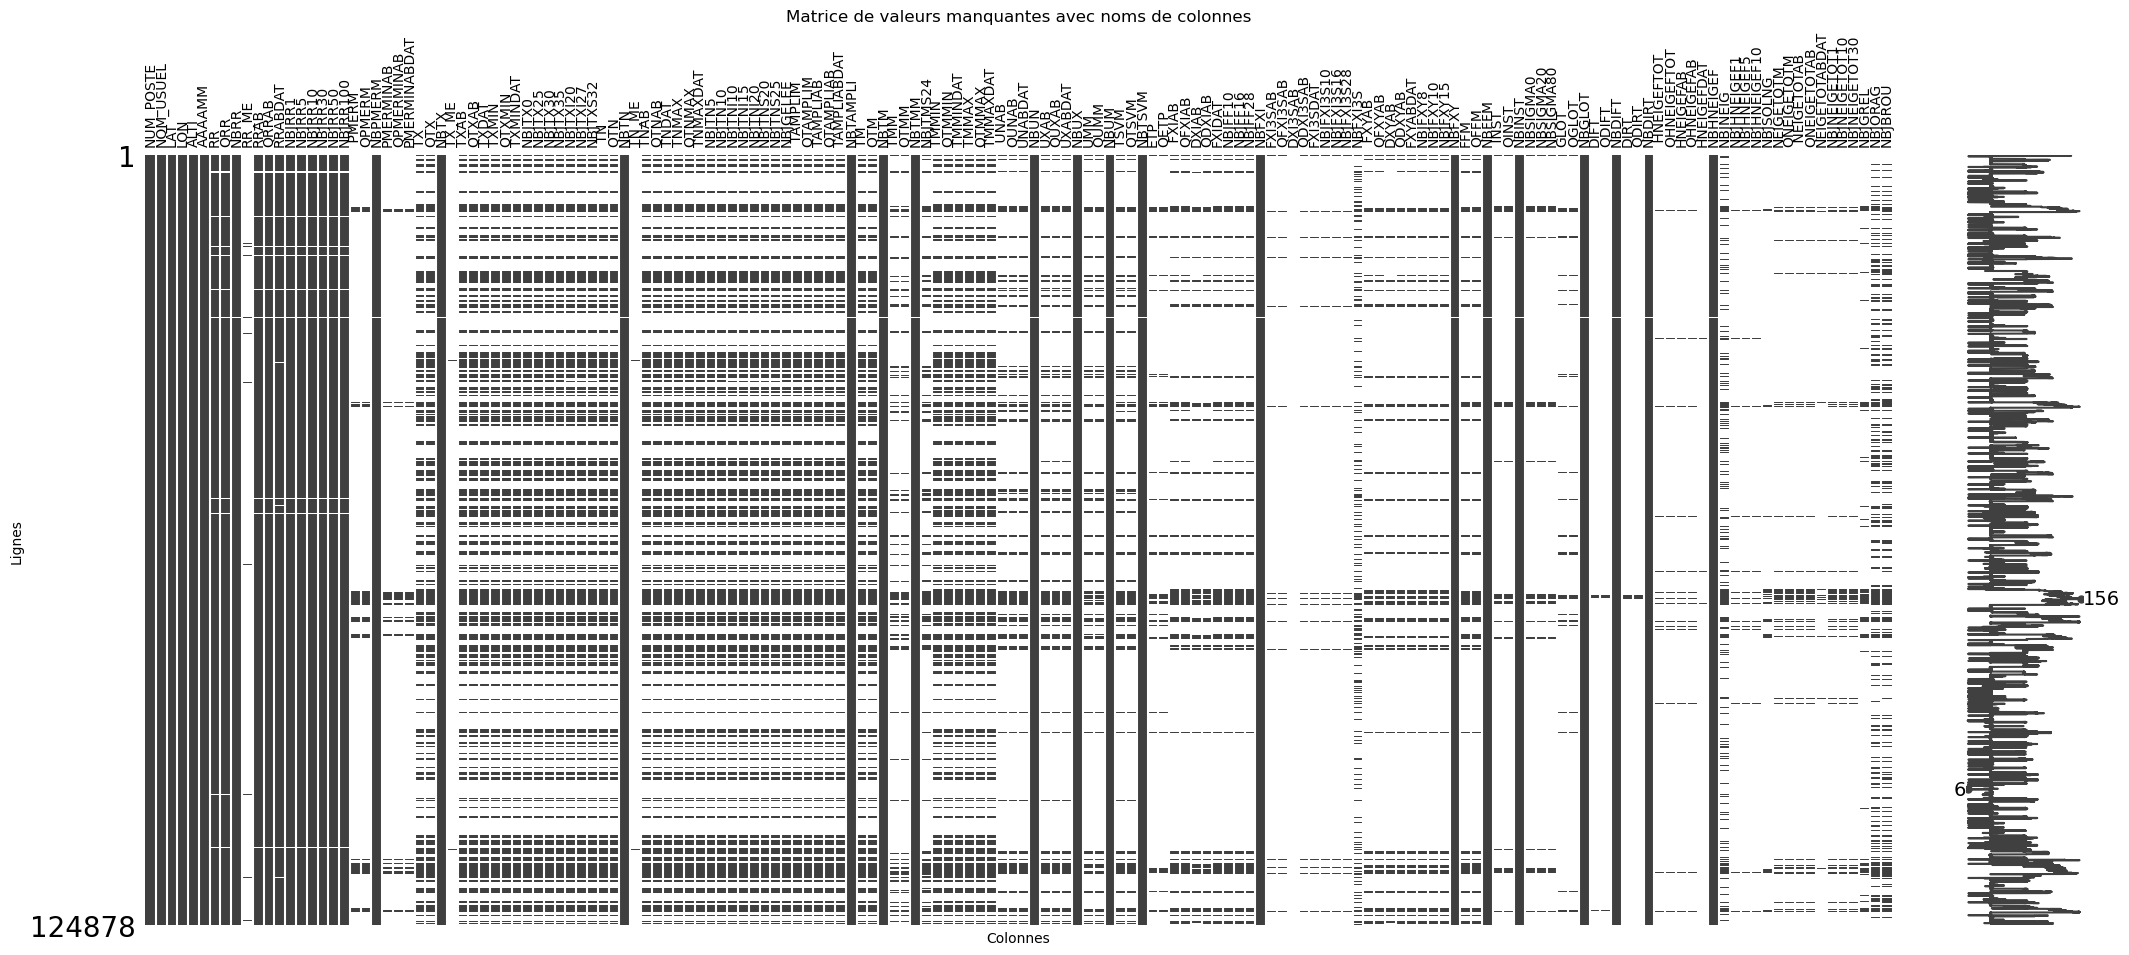

In [10]:
profil_données(df_concat)

In [11]:
# repérages des colonnes muettes
indices_a_supprimer = [
    (' FXYAB', 'NBJFXY15'),
    ('FXI3SAB','NBJFXI3S28'),
    ('DIRT','QDIRT'),
    ('DIFT','QDIFT'),
    (' HNEIGEFTOT', 'HNEIGEFDAT'),
    ('NBJHNEIGEF1','NBJGREL'),
    ('PMERMINAB','PMERMINABDAT'),
]

# Boucle sur chaque paire d'indices pour la suppression des colonnes muettes
for debut, fin in indices_a_supprimer:
    
    # repérage de l'indice des colonnes
    indice_colonne_debut = df_concat.columns.get_loc(debut)
    indice_colonne_fin = df_concat.columns.get_loc(fin)

    # Création d'une liste des noms de colonnes à supprimer
    colonnes_a_supprimer = df_concat.columns[indice_colonne_debut:indice_colonne_fin + 1]

    # Suppression des colonnes
    df_concat = df_concat.drop(columns=colonnes_a_supprimer)

# suppression de colonnes particulières    
df_concat = df_concat.drop(["RR_ME", "TX_ME", "TN_ME",'NUM_POSTE','NOM_USUEL','DXIAB'], axis=1)

# Sélection des colonnes qui ne commencent pas par 'Q'
df_concat = df_concat.filter(regex='^(?!Q)')

# Sélectionner des colonnes qui ne commencent pas par 'N'
df_concat = df_concat.filter(regex='^(?!N)')

# Sélection des colonnes qui ne se terminent pas par 'DAT' ou 'AB'
df_concat = df_concat.loc[:, ~df_concat.columns.str.endswith(('DAT', 'AB'))]

# Affichage du DataFrame après suppression
df_concat

,LAT,LON,ALTI,AAAAMM,RR,PMERM,TX,TXMIN,TN,TNMAX,...,TM,TMM,TMMIN,TMMAX,UMM,TSVM,ETP,FFM,INST,GLOT
0,48.844667,2.333833,46,202301,49.3,NaN,8.8,2.1,4.9,11.9,...,6.9,6.8,1.0,13.5,NaN,NaN,NaN,NaN,NaN,NaN
1,48.844667,2.333833,46,202302,2.4,NaN,11.9,7.5,4.4,11.5,...,8.1,7.5,3.5,13.8,NaN,NaN,NaN,NaN,NaN,NaN
2,48.844667,2.333833,46,202303,58.3,NaN,13.9,6.7,7.0,13.2,...,10.4,10.1,3.8,15.9,NaN,NaN,NaN,NaN,NaN,NaN
3,48.844667,2.333833,46,202304,63.4,NaN,16.7,9.5,7.3,15.0,...,12.0,11.4,7.8,19.8,NaN,NaN,NaN,NaN,NaN,NaN
4,48.844667,2.333833,46,202305,62.5,NaN,22.2,14.8,10.8,14.0,...,16.5,16.2,12.4,20.9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10542,49.108167,1.830667,126,202208,3.6,NaN,28.2,24.7,12.6,17.2,...,20.4,20.6,15.2,24.8,62.0,14.0,NaN,2.9,NaN,NaN
10543,49.108167,1.830667,126,202209,52.4,NaN,21.1,13.8,9.4,17.1,...,15.3,14.9,10.2,21.3,78.0,13.1,NaN,3.1,NaN,NaN
10544,49.108167,1.830667,126,202210,41.4,NaN,19.5,14.7,10.1,15.0,...,14.8,14.3,9.9,20.0,84.0,13.7,NaN,3.3,NaN,NaN
10545,49.108167,1.830667,126,202211,58.4,NaN,12.1,6.2,6.1,10.6,...,9.1,8.8,4.5,13.3,90.0,10.3,NaN,4.5,NaN,NaN


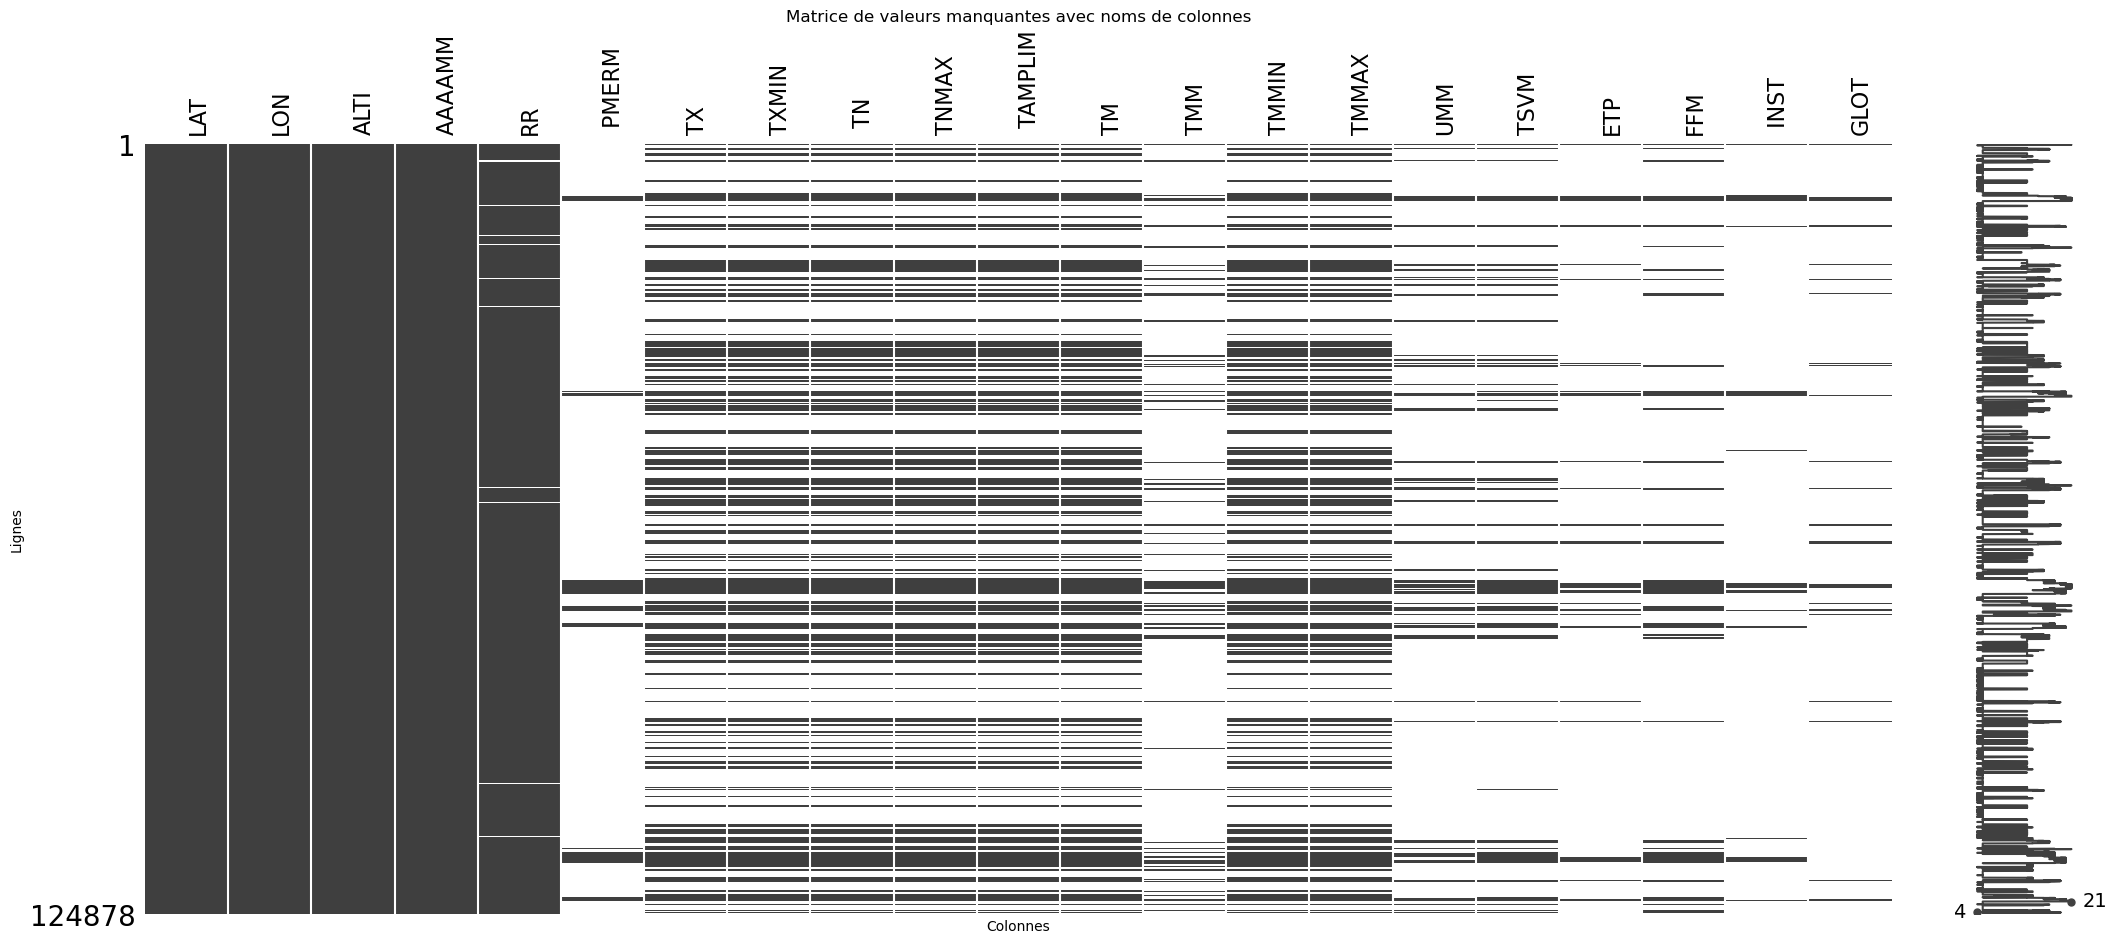

In [12]:
profil_données(df_concat)

In [13]:
df_concat.dtypes

LAT         float64
LON         float64
ALTI          int64
AAAAMM        int64
RR          float64
 PMERM      float64
TX          float64
TXMIN       float64
 TN         float64
TNMAX       float64
 TAMPLIM    float64
TM          float64
TMM         float64
TMMIN       float64
TMMAX       float64
UMM         float64
TSVM        float64
ETP         float64
FFM         float64
 INST       float64
GLOT        float64
dtype: object

In [14]:
# Convertion de la colonne AAAAMM en format datetime 
df_concat['AAAAMM'] = pd.to_datetime(df_concat['AAAAMM'], format='%Y%m')

# une fonction de moyenne personnalisée qui ignore les valeurs NaN
def moyenne_non_nulle(colonne):
    valeurs_non_nulles = colonne.dropna()
    if valeurs_non_nulles.empty:
        return None
    else:
        return valeurs_non_nulles.mean()

# Groupage par date et application la fonction de moyenne personnalisée à chaque groupe
df_mean_non_null = df_concat.groupby('AAAAMM').agg(moyenne_non_nulle)

# On tronque les valeurs à 1 chiffre après la virgule 
df_mean_non_null = df_mean_non_null.round(1)

# on réinitialiser l'index pour que la colonne AAAAMM soit une colonne régulière
df_mean_non_null.reset_index(inplace=True)

In [15]:
# On Affiche le Dataset
df_mean_non_null

,AAAAMM,LAT,LON,ALTI,RR,PMERM,TX,TXMIN,TN,TNMAX,...,TM,TMM,TMMIN,TMMAX,UMM,TSVM,ETP,FFM,INST,GLOT
0,1950-01-01,48.8,2.5,81.2,25.9,1022.3,5.1,-2.4,-0.7,7.9,...,2.2,2.2,-4.5,8.7,90.0,6.7,9.0,3.6,3165.0,NaN
1,1950-02-01,48.8,2.5,81.8,64.6,1012.3,10.6,3.5,3.2,9.0,...,6.9,6.8,0.3,11.3,NaN,8.2,27.5,6.2,5728.4,NaN
2,1950-03-01,48.8,2.5,81.8,20.3,1021.3,12.6,5.4,2.8,9.1,...,7.7,7.7,0.8,12.2,80.3,8.2,49.9,3.6,9676.8,NaN
3,1950-04-01,48.8,2.5,81.8,63.6,1010.5,13.7,8.4,4.2,8.7,...,9.0,8.7,4.4,14.5,NaN,8.4,80.0,4.8,8836.2,NaN
4,1950-05-01,48.8,2.5,81.8,59.1,1016.0,20.3,12.2,8.9,14.6,...,14.6,14.3,8.6,19.9,75.0,12.1,112.2,3.2,13103.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2023-12-01,48.8,2.4,101.9,68.4,1016.7,9.6,2.9,5.2,10.5,...,7.4,7.3,-0.0,11.4,87.5,9.2,13.9,4.4,2443.2,7181.9
888,2024-01-01,48.8,2.4,101.9,63.0,1020.3,7.3,-1.7,1.5,11.1,...,4.4,4.1,-2.6,12.8,84.7,7.4,13.7,3.9,4952.0,10839.3
889,2024-02-01,48.8,2.4,101.9,85.2,1014.1,11.5,8.1,6.4,11.4,...,8.9,8.7,5.1,13.3,87.4,9.9,22.1,4.2,2074.2,11599.0
890,2024-03-01,48.8,2.4,101.9,88.1,1008.1,14.0,8.3,5.7,11.6,...,9.9,9.3,5.7,14.6,81.9,9.5,50.8,3.4,7509.8,30544.1


In [16]:
df_mean_non_null.describe()

,AAAAMM,LAT,LON,ALTI,RR,PMERM,TX,TXMIN,TN,TNMAX,...,TM,TMM,TMMIN,TMMAX,UMM,TSVM,ETP,FFM,INST,GLOT
count,892,892.000000,892.000000,892.000000,892.000000,890.000000,892.000000,892.000000,892.000000,892.000000,...,892.000000,869.000000,892.000000,892.000000,879.000000,892.000000,891.000000,892.000000,892.000000,748.000000
mean,1987-02-15 01:53:00.269058304,48.771413,2.427691,91.496413,54.858632,1016.777640,15.591928,8.851345,6.828924,12.983184,...,11.210426,10.834753,5.603363,17.086659,78.905233,10.699552,63.950168,3.649888,8665.924664,33047.521123
min,1950-01-01 00:00:00,48.700000,2.400000,78.000000,0.600000,1003.200000,-0.500000,-10.800000,-9.200000,1.000000,...,-4.900000,-4.500000,-13.800000,3.000000,56.200000,3.700000,5.600000,2.000000,910.700000,4789.500000
25%,1968-07-24 06:00:00,48.700000,2.400000,83.975000,34.475000,1014.200000,9.400000,2.500000,3.000000,9.800000,...,6.375000,6.000000,0.300000,12.200000,73.900000,8.000000,16.550000,3.100000,4612.125000,12755.825000
50%,1987-02-15 00:00:00,48.800000,2.400000,93.300000,52.000000,1016.700000,15.600000,8.950000,6.450000,12.600000,...,10.900000,10.500000,5.450000,16.700000,78.500000,10.200000,57.200000,3.600000,8585.250000,32258.150000
75%,2005-09-08 12:00:00,48.800000,2.500000,95.500000,71.975000,1019.175000,21.700000,15.325000,11.100000,16.500000,...,16.425000,16.000000,11.625000,21.800000,85.700000,13.700000,107.100000,4.100000,12173.775000,50976.550000
max,2024-04-01 00:00:00,48.800000,2.500000,103.600000,177.800000,1032.200000,30.500000,24.600000,16.800000,22.600000,...,23.600000,23.700000,20.300000,31.600000,93.000000,18.900000,173.200000,6.200000,21067.000000,75689.900000
std,NaN,0.045208,0.044772,6.734812,28.101128,4.319817,6.881947,7.206680,4.749646,4.123991,...,5.767442,5.728909,6.566573,5.631066,7.538446,3.166473,46.149393,0.723868,4411.160031,19713.062022


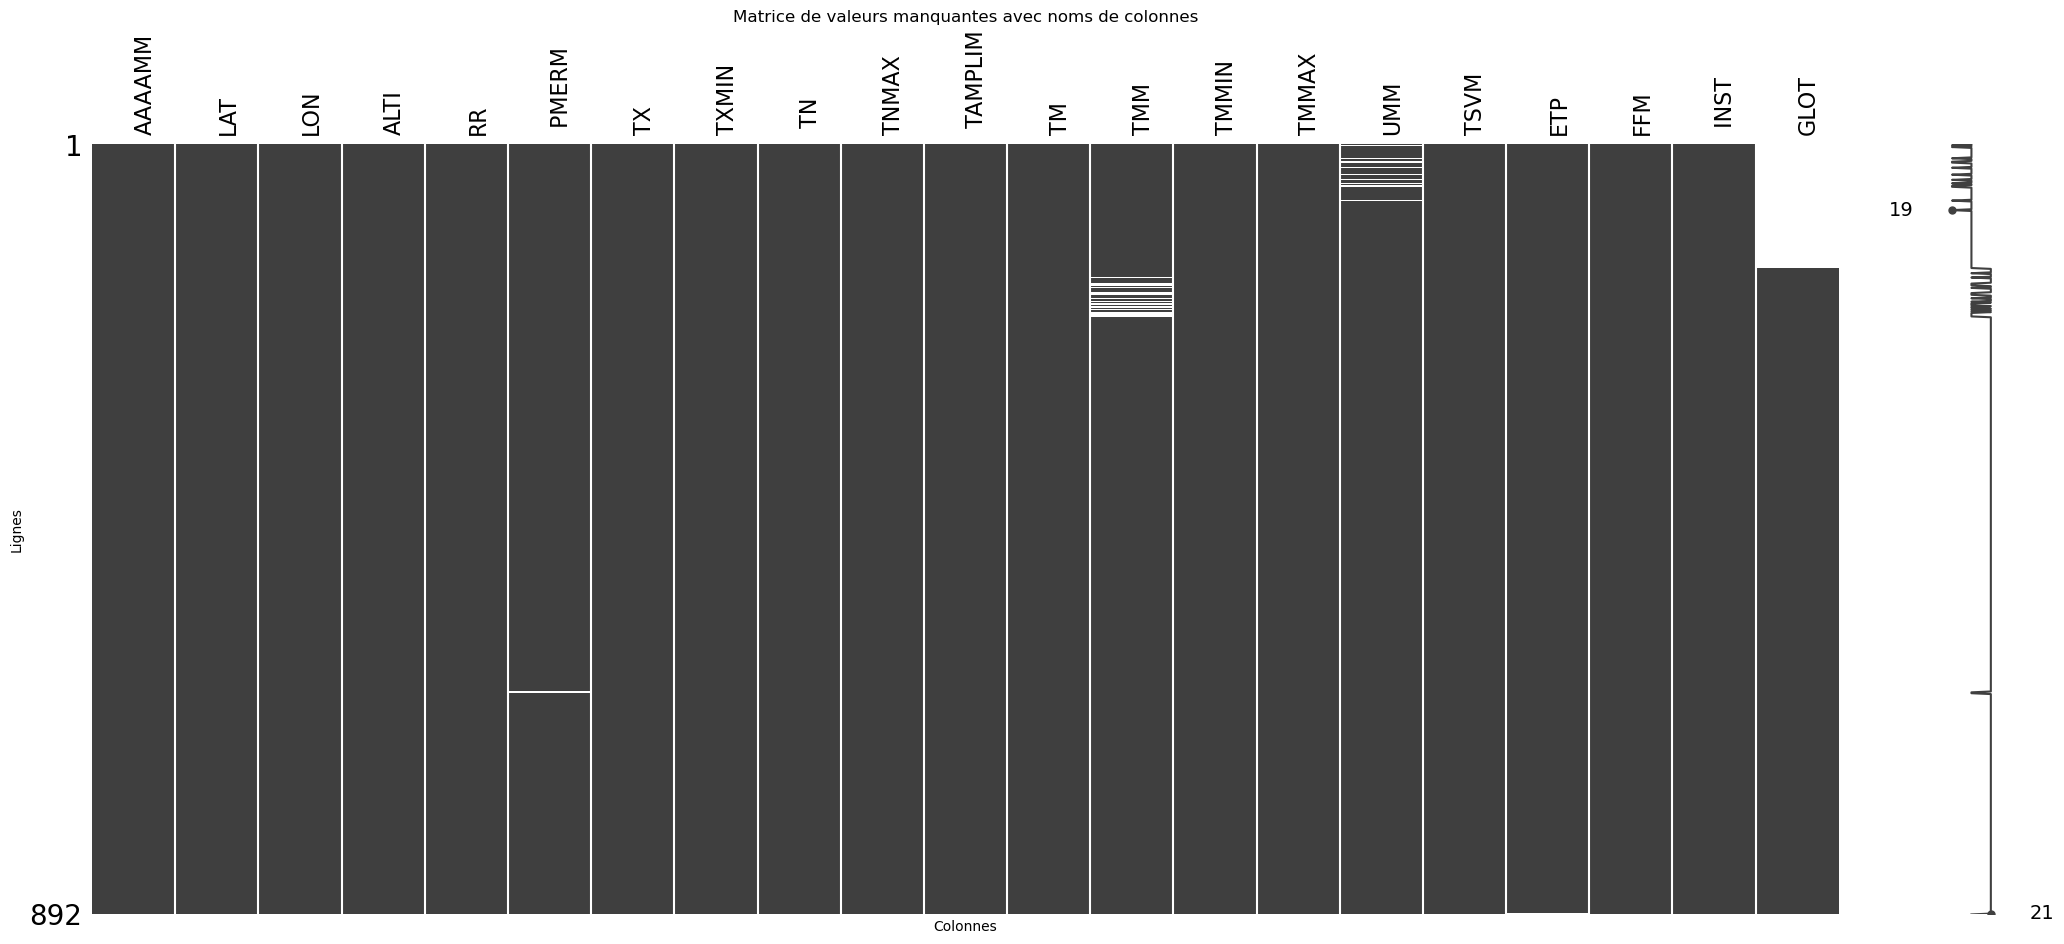

In [17]:
profil_données(df_mean_non_null)

In [18]:
# Remplir les valeurs vides de la colonne "TMM" par les valeurs de la colonne "TM"
df_mean_non_null['TMM'].fillna(df_mean_non_null['TM'], inplace=True)

In [19]:
# Définition  d'une fonction pour remplir les lignes vides de la colonne UMM
def remplir_UMM_vide(row, col):
    
    # on obtient l'index de la ligne actuelle
    index_actuel = row.name
    
    # on obtient la date actuelle
    date_actuelle = row['AAAAMM']
    
    # on détermine  les dates des deux années suivantes
    annee_suivante = date_actuelle.year + 1
    annee_suivante_2 = date_actuelle.year + 2
    
    # on filtre les données pour les deux années suivantes
    donnees_annees_suivantes = df_mean_non_null[(df_mean_non_null['AAAAMM'].dt.year == annee_suivante) | (df_mean_non_null['AAAAMM'].dt.year == annee_suivante_2)]
    
    # on Calcul la moyenne des valeurs non nulles de la colonne UMM pour les deux années suivantes
    moyenne = donnees_annees_suivantes[col].mean()
    
    return moyenne

In [20]:
# Application de la fonction à chaque ligne pour remplir les lignes vides de la colonne UMM
df_mean_non_null['UMM'].fillna(df_mean_non_null.apply(remplir_UMM_vide, args=('UMM',), axis=1), inplace=True)

In [21]:
# Application de la fonction à chaque ligne pour remplir les lignes vides de la colonne PMERM
df_mean_non_null[' PMERM'].fillna(df_mean_non_null.apply(remplir_UMM_vide, args=(' PMERM',), axis=1), inplace=True)

In [22]:
# on sépare l'année du mois pour une plus bonne représentation et une faciliité d'usage 

# Extraiction du mois et l'année dans de nouvelles colonnes
df_mean_non_null.insert(1, 'YEAR', df_mean_non_null['AAAAMM'].dt.year)
df_mean_non_null.insert(2, 'MONTH', df_mean_non_null['AAAAMM'].dt.month)

# Suppression de la colonne AAAAMM
df_mean_non_null.drop(columns=['AAAAMM'], inplace=True)

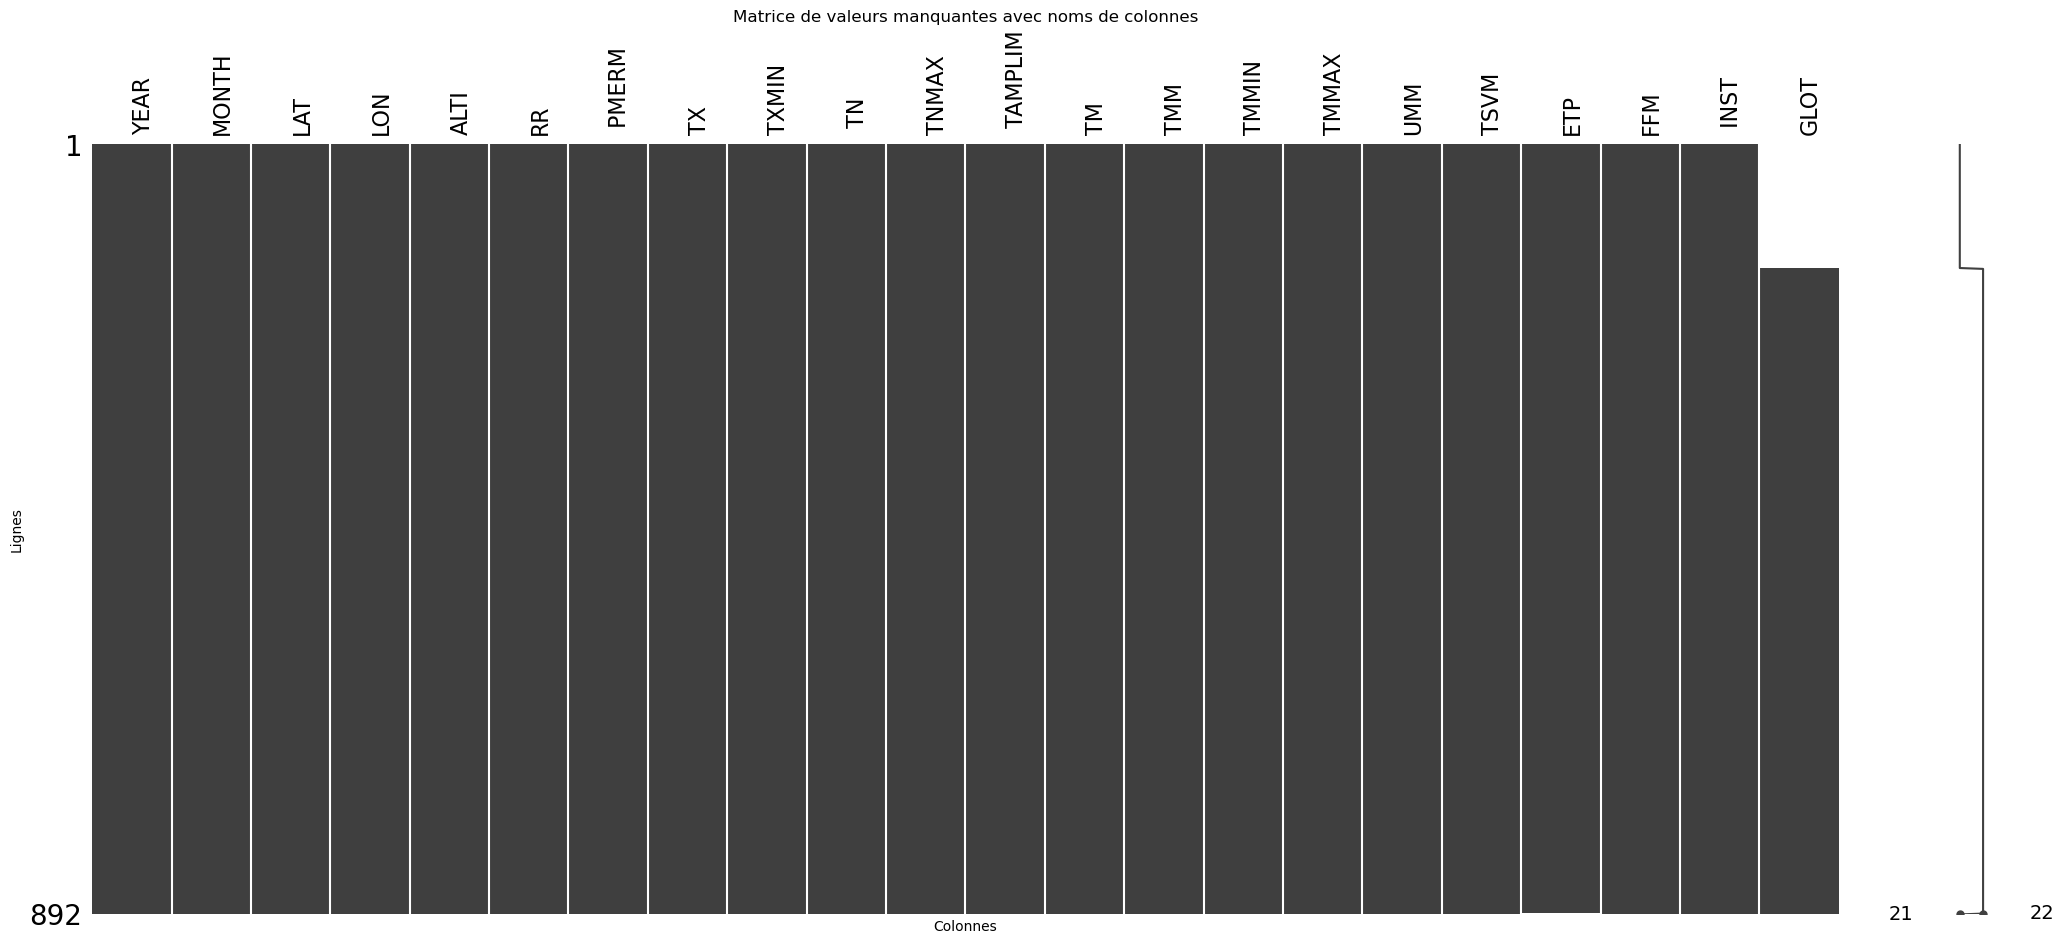

In [23]:
profil_données(df_mean_non_null)

In [24]:
df_mean_non_null["GLOT"].isnull().sum()

144

In [28]:
# On observe le type des colonnes 
df_mean_non_null.dtypes

YEAR          int32
MONTH         int32
LAT         float64
LON         float64
ALTI        float64
RR          float64
 PMERM      float64
TX          float64
TXMIN       float64
 TN         float64
TNMAX       float64
 TAMPLIM    float64
TM          float64
TMM         float64
TMMIN       float64
TMMAX       float64
UMM         float64
TSVM        float64
ETP         float64
FFM         float64
 INST       float64
GLOT        float64
dtype: object

In [25]:
# on exporte les datas clean au format excel
df_mean_non_null.to_excel("data_clean_idf.xlsx", index= False)